<a href="https://colab.research.google.com/github/anushagupta22/image_classification/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader
import bing_image_downloader

In [ ]:
!mkdir images
from bing_image_downloader import downloader

In [ ]:
downloader.download('bikes', limit=10,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download('cars', limit=10,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.bikesdirect.com/products/mercier/images/elle_adv_blue_2100.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.bikesdirect.com/products/gravity/mountain_bikes/29-point1-mattred-21.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://p.vitalbmx.com/photos/products/9716/photos/17811/s1600_nagas_org.jpg?1449257146
[%] File Downloaded !

[%] Downloading Image #4 from http://www.bikesdirect.com/products/motobecane/images/300htw_turqs_2100.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.bikesdirect.com/products/dawes/images/lt-sport-grn-xiv-2100.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.bikesdirect.com/products/gravity/275-650b-mountain-bikes/fsx-275-x5-yel-21.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.bikesdirect.com/products/gravity/fat-bikes/bullseye-monster-seafoam-21.jpg
[%] File Downloaded

In [ ]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
target=[]
images=[]
flat_data=[]
import os

DATADIR = '/content/images'
CATEGORIES = ['cars','bikes']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target = np.array(target)
target = target.reshape(-1,1)
images = np.array(images)
image = images.reshape(-1)
flat_data = np.array(flat_data)


In [ ]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.186523,0.141176,0.058824,0.192157,0.145098,0.054902,0.192157,0.145098,0.054902,0.192157,0.145098,0.054902,0.196078,0.149020,0.054902,0.203425,0.156366,0.054902,0.207843,0.160784,0.062745,0.215686,0.168627,0.074510,0.225242,0.178183,0.084065,0.235294,0.188235,0.094118,0.254654,0.203922,0.111765,0.274013,0.211765,0.121569,0.282353,0.219608,0.129412,0.294118,...,0.384562,0.417647,0.454902,0.421320,0.452693,0.491908,0.396078,0.415686,0.462745,0.415686,0.435294,0.480144,0.388484,0.417647,0.459072,0.364706,0.400248,0.441176,0.376471,0.409804,0.452693,0.407843,0.442889,0.478431,0.384810,0.424026,0.455895,0.387739,0.426954,0.462248,0.368627,0.402209,0.439216,0.341673,0.373046,0.412261,0.349020,0.376967,0.415686,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.003268,0.109150,0.073712,0.090837,0.214549,0.175333,0.206667,0.226667,0.183529,0.215124,0.218824,0.167843,0.203137,0.203137,0.156078,0.179608,0.211490,0.164314,0.180118,0.219216,0.142484,0.180000,0.223137,0.132941,0.180000,0.203281,0.144706,0.183922,0.199216,0.156471,0.187843,0.195686,...,0.434771,0.434771,0.434771,0.434118,0.434118,0.434118,0.433765,0.433765,0.433765,0.429804,0.429804,0.429804,0.429804,0.429804,0.429804,0.425882,0.425882,0.425882,0.429804,0.429804,0.429804,0.429804,0.429804,0.429804,0.421176,0.421176,0.421176,0.187830,0.187830,0.187830,0.003268,0.003268,0.003268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.725490,0.796078,0.843137,0.729412,0.800000,0.847059,0.729412,0.800000,0.847059,0.733333,0.803922,0.850980,0.733333,0.803922,0.850980,0.737255,0.803922,0.850980,0.741176,0.803922,0.854902,0.745098,0.807843,0.858824,0.745098,0.807843,0.858824,0.749020,0.811765,0.862745,0.749020,0.811765,0.862745,0.749020,0.811765,0.862745,0.752941,0.815686,0.866667,0.752941,...,0.220889,0.223699,0.190222,0.491482,0.486301,0.106065,0.847765,0.793285,0.020392,0.943230,0.850980,0.003922,0.850641,0.778719,0.059660,0.537725,0.493388,0.182298,0.283074,0.270342,0.200967,0.197412,0.196870,0.196078,0.192157,0.192157,0.200000,0.192157,0.196078,0.203922,0.188235,0.192157,0.200000,0.184314,0.188235,0.196078,0.184314,0.188235,0.196078,0
3,0.523830,0.610105,0.630510,0.503490,0.594484,0.627817,0.496876,0.588235,0.618810,0.485908,0.575739,0.610235,0.523961,0.597307,0.618876,0.598209,0.641843,0.641111,0.741647,0.748026,0.706484,0.863412,0.821869,0.757961,0.903556,0.830209,0.767464,0.866000,0.802092,0.744000,0.870353,0.809935,0.736157,0.914222,0.843203,0.756131,0.899464,0.825621,0.745529,0.829373,...,0.742340,0.667830,0.609007,0.748654,0.674144,0.615320,0.751346,0.676837,0.616850,0.764340,0.689830,0.623163,0.773346,0.698837,0.635294,0.772549,0.698039,0.639216,0.769425,0.694915,0.636092,0.760784,0.686275,0.621935,0.780026,0.705516,0.638850,0.774876,0.700366,0.640379,0.741176,0.666667,0.607843,0.760784,0.686275,0.627451,0.758026,0.683516,0.624693,0
4,0.000000,0.000000,0.031373,0.000000,0.000000,0.040196,0.000000,0.000000,0.049020,0.000000,0.000000,0.058824,0.000000,0.000000,0.067647,0.000000,0.000000,0.074510,0.000000,0.000000,0.082026,0.000000,0.000000,0.088235,0.000000,0.000000,0.094118,0.000000,0.000000,0.101961,0.000000,0.000000,0.106863,0.000000,0.000000,0.113725,0.000000,0.000000,0.117647,0.000000,...,0.764706,0.772222,0.778431,0.760784,0.768627,0.776471,0.758824,0.764706,0.774510,0.758824,0.764706,0.776471,0.760458,0.764706,0.776471,0.760784,0.764706,0.777451,0.760784,0.764706,0.776471,0.756863,0.764706,0.776471,0.752941,0.760784,0.776471,0.752941,0.760784,0.774837,0.752941,0.760784,0.772549,0.744118,0.752941,0.765686,0.723529,0.734967,0.750654,0
5,0.857621,0.861835,0.717399,0.914039,0.894431,0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 67501 entries, 0 to Target
dtypes: float64(67500), int64(1)
memory usage: 10.3 MB


In [ ]:
cars_bikes = df.select_dtypes(include=['float64','int64'])
cars_bikes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.186523,0.141176,0.058824,0.192157,0.145098,0.054902,0.192157,0.145098,0.054902,0.192157,0.145098,0.054902,0.196078,0.149020,0.054902,0.203425,0.156366,0.054902,0.207843,0.160784,0.062745,0.215686,0.168627,0.074510,0.225242,0.178183,0.084065,0.235294,0.188235,0.094118,0.254654,0.203922,0.111765,0.274013,0.211765,0.121569,0.282353,0.219608,0.129412,0.294118,...,0.384562,0.417647,0.454902,0.421320,0.452693,0.491908,0.396078,0.415686,0.462745,0.415686,0.435294,0.480144,0.388484,0.417647,0.459072,0.364706,0.400248,0.441176,0.376471,0.409804,0.452693,0.407843,0.442889,0.478431,0.384810,0.424026,0.455895,0.387739,0.426954,0.462248,0.368627,0.402209,0.439216,0.341673,0.373046,0.412261,0.349020,0.376967,0.415686,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.003268,0.109150,0.073712,0.090837,0.214549,0.175333,0.206667,0.226667,0.183529,0.215124,0.218824,0.167843,0.203137,0.203137,0.156078,0.179608,0.211490,0.164314,0.180118,0.219216,0.142484,0.180000,0.223137,0.132941,0.180000,0.203281,0.144706,0.183922,0.199216,0.156471,0.187843,0.195686,...,0.434771,0.434771,0.434771,0.434118,0.434118,0.434118,0.433765,0.433765,0.433765,0.429804,0.429804,0.429804,0.429804,0.429804,0.429804,0.425882,0.425882,0.425882,0.429804,0.429804,0.429804,0.429804,0.429804,0.429804,0.421176,0.421176,0.421176,0.187830,0.187830,0.187830,0.003268,0.003268,0.003268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.725490,0.796078,0.843137,0.729412,0.800000,0.847059,0.729412,0.800000,0.847059,0.733333,0.803922,0.850980,0.733333,0.803922,0.850980,0.737255,0.803922,0.850980,0.741176,0.803922,0.854902,0.745098,0.807843,0.858824,0.745098,0.807843,0.858824,0.749020,0.811765,0.862745,0.749020,0.811765,0.862745,0.749020,0.811765,0.862745,0.752941,0.815686,0.866667,0.752941,...,0.220889,0.223699,0.190222,0.491482,0.486301,0.106065,0.847765,0.793285,0.020392,0.943230,0.850980,0.003922,0.850641,0.778719,0.059660,0.537725,0.493388,0.182298,0.283074,0.270342,0.200967,0.197412,0.196870,0.196078,0.192157,0.192157,0.200000,0.192157,0.196078,0.203922,0.188235,0.192157,0.200000,0.184314,0.188235,0.196078,0.184314,0.188235,0.196078,0
3,0.523830,0.610105,0.630510,0.503490,0.594484,0.627817,0.496876,0.588235,0.618810,0.485908,0.575739,0.610235,0.523961,0.597307,0.618876,0.598209,0.641843,0.641111,0.741647,0.748026,0.706484,0.863412,0.821869,0.757961,0.903556,0.830209,0.767464,0.866000,0.802092,0.744000,0.870353,0.809935,0.736157,0.914222,0.843203,0.756131,0.899464,0.825621,0.745529,0.829373,...,0.742340,0.667830,0.609007,0.748654,0.674144,0.615320,0.751346,0.676837,0.616850,0.764340,0.689830,0.623163,0.773346,0.698837,0.635294,0.772549,0.698039,0.639216,0.769425,0.694915,0.636092,0.760784,0.686275,0.621935,0.780026,0.705516,0.638850,0.774876,0.700366,0.640379,0.741176,0.666667,0.607843,0.760784,0.686275,0.627451,0.758026,0.683516,0.624693,0
4,0.000000,0.000000,0.031373,0.000000,0.000000,0.040196,0.000000,0.000000,0.049020,0.000000,0.000000,0.058824,0.000000,0.000000,0.067647,0.000000,0.000000,0.074510,0.000000,0.000000,0.082026,0.000000,0.000000,0.088235,0.000000,0.000000,0.094118,0.000000,0.000000,0.101961,0.000000,0.000000,0.106863,0.000000,0.000000,0.113725,0.000000,0.000000,0.117647,0.000000,...,0.764706,0.772222,0.778431,0.760784,0.768627,0.776471,0.758824,0.764706,0.774510,0.758824,0.764706,0.776471,0.760458,0.764706,0.776471,0.760784,0.764706,0.777451,0.760784,0.764706,0.776471,0.756863,0.764706,0.776471,0.752941,0.760784,0.776471,0.752941,0.760784,0.774837,0.752941,0.760784,0.772549,0.744118,0.752941,0.765686,0.723529,0.734967,0.750654,0


In [ ]:
cars_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 67501 entries, 0 to Target
dtypes: float64(67500), int64(1)
memory usage: 10.3 MB


In [ ]:
X = cars_bikes.iloc[:,0:67500].values
Y = cars_bikes.iloc[:,67500].values

In [ ]:
print(X.ndim)
print(Y.ndim)
print(X.shape)
print(Y.shape)

2
1
(20, 67500)
(20,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)

In [ ]:
X_train[0]
Y_train[0]

1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [ ]:
print(X_train.shape)
print(X_test.shape)

(15, 67500)
(5, 67500)


In [ ]:
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([1, 0, 1, 0, 1])

In [ ]:
Y_test

array([1, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(Y_pred,Y_test))
print(confusion_matrix(Y_pred,Y_test))

1.0
[[2 0]
 [0 3]]


enter your URLhttps://images.unsplash.com/photo-1542362567-b07e54358753?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max&ixid=eyJhcHBfaWQiOjEyMDd9
(720, 1080, 3)
PREDICT OUTPUT: cars


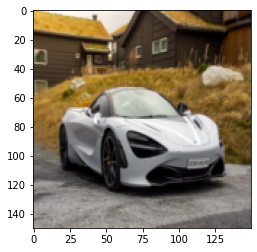

In [ ]:
flat_data=[]
url = input('enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_dat = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
output = model.predict(flat_data)
output = CATEGORIES[output[0]]
print(f'PREDICT OUTPUT: {output}')